In [1]:
!pip install fasttext

## Initialization Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, GlobalMaxPooling2D, Conv1D, BatchNormalization, Dropout, GRU, MaxPooling1D
from tensorflow.keras.optimizers import Adam

import fasttext
import fasttext.util

import pickle

## Get The Data

In [3]:
dataset_url = 'https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/recipe_dataset.csv'
dataset = pd.read_csv(dataset_url)
dataset.head()

,Title,Ingredients,Label
0,Ayam Woku Manado,ekor,0
1,Ayam Woku Manado,ekor ayam,0
2,Ayam Woku Manado,ekor ayam jeruk,0
3,Ayam Woku Manado,ekor ayam jeruk nipis,0
4,Ayam Woku Manado,ekor ayam jeruk nipis garam,0


## Preparing Data

In [4]:
padding_type = 'post'

In [5]:
train_ingredients = dataset['Ingredients']
train_ingredients

0                               ekor
1                          ekor ayam
2                    ekor ayam jeruk
3              ekor ayam jeruk nipis
4        ekor ayam jeruk nipis garam
                    ...             
33130                  bawang minyak
33131         bawang minyak margarin
33132                         minyak
33133                minyak margarin
33134                       margarin
Name: Ingredients, Length: 33135, dtype: object

In [6]:
labels = dataset['Label']
labels

0          0
1          0
2          0
3          0
4          0
        ... 
33130    144
33131    144
33132    144
33133    144
33134    144
Name: Label, Length: 33135, dtype: int64

In [7]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_ingredients)
sequences = tokenizer.texts_to_sequences(train_ingredients)
word_index = tokenizer.word_index
print(f'Lenght of word index: {len(word_index)}')

Lenght of word index: 217


In [8]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
sequences

[[91],
 [91, 38],
 [91, 38, 11],
 [91, 38, 11, 35],
 [91, 38, 11, 35, 7],
 [91, 38, 11, 35, 7, 17],
 [91, 38, 11, 35, 7, 17, 2],
 [91, 38, 11, 35, 7, 17, 2, 3],
 [91, 38, 11, 35, 7, 17, 2, 3, 2],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32, 5],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32, 5, 16],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32, 5, 16, 5],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32, 5, 16, 5, 70],
 [91, 38, 11, 35, 7, 17, 2, 3, 2, 4, 6, 3, 6, 12, 3, 21, 32, 5, 16, 5, 70, 10],
 [38],
 [38, 11],
 [38, 11, 35],
 [38, 11, 35, 

In [10]:
word_index

{'<OOV>': 1,
 'bawang': 2,
 'merah': 3,
 'putih': 4,
 'daun': 5,
 'cabe': 6,
 'garam': 7,
 'bumbu': 8,
 'gula': 9,
 'air': 10,
 'jeruk': 11,
 'rawit': 12,
 'jahe': 13,
 'kecap': 14,
 'saus': 15,
 'salam': 16,
 'kunyit': 17,
 'minyak': 18,
 'tomat': 19,
 'sendok': 20,
 'kemiri': 21,
 'cabai': 22,
 'tepung': 23,
 'lada': 24,
 'manis': 25,
 'merica': 26,
 'teh': 27,
 'ketumbar': 28,
 'lengkuas': 29,
 'tiram': 30,
 'saos': 31,
 'sereh': 32,
 'santan': 33,
 'bombay': 34,
 'nipis': 35,
 'wortel': 36,
 'telur': 37,
 'ayam': 38,
 'kaldu': 39,
 'jamur': 40,
 'maizena': 41,
 'serai': 42,
 'cengkeh': 43,
 'terigu': 44,
 'ikan': 45,
 'keriting': 46,
 'sapi': 47,
 'pasir': 48,
 'daging': 49,
 'biji': 50,
 'kapulaga': 51,
 'royco': 52,
 'jinten': 53,
 'kambing': 54,
 'tulang': 55,
 'kacang': 56,
 'pala': 57,
 'hijau': 58,
 'seledri': 59,
 'jawa': 60,
 'udang': 61,
 'sambal': 62,
 'tempe': 63,
 'saori': 64,
 'asam': 65,
 'kelapa': 66,
 'kayu': 67,
 'kulit': 68,
 'kol': 69,
 'kemangi': 70,
 'teriyaki'

In [11]:
max_seq_length = max([len(seq) for seq in sequences])
data_padded = pad_sequences(sequences, maxlen=max_seq_length, padding=padding_type)
print(f"Shape of padded train data: {data_padded.shape}")

Shape of padded train data: (33135, 46)


In [12]:
data_padded

array([[ 91,   0,   0, ...,   0,   0,   0],
       [ 91,  38,   0, ...,   0,   0,   0],
       [ 91,  38,  11, ...,   0,   0,   0],
       ...,
       [ 18,   0,   0, ...,   0,   0,   0],
       [ 18, 120,   0, ...,   0,   0,   0],
       [120,   0,   0, ...,   0,   0,   0]], dtype=int32)

In [13]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz

--2024-06-20 15:11:36--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.102, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4507049071 (4.2G) [application/octet-stream]
Saving to: ‘cc.id.300.bin.gz’

cc.id.300.bin.gz    100%[===================>]   4.20G   229MB/s    in 28s     

2024-06-20 15:12:04 (154 MB/s) - ‘cc.id.300.bin.gz’ saved [4507049071/4507049071]



In [14]:
!gunzip cc.id.300.bin.gz

In [15]:
fasttext_model_path = 'cc.id.300.bin'
fasttext_model = fasttext.load_model(fasttext_model_path)
similar_words = fasttext_model.get_nearest_neighbors('udang')
print(similar_words)

[(0.7454337477684021, 'udangnya'), (0.7187339067459106, 'udang-udang'), (0.6976996660232544, 'udang.'), (0.6726832985877991, 'Udang'), (0.6652981042861938, 'ikan'), (0.6560273170471191, 'penaeid'), (0.6477164626121521, 'kepiting'), (0.6399943232536316, 'udang-udangan'), (0.6372252702713013, 'udang2'), (0.632969319820404, 'Udang-udang')]


In [16]:
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = fasttext_model.get_word_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(f"Shape of embedding matrix: {embedding_matrix.shape}")

Shape of embedding matrix: (218, 300)


In [17]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00119659,  0.00295095, -0.00195914, ...,  0.00173911,
         0.00369924,  0.00036759],
       [-0.06756485, -0.10935757, -0.047129  , ..., -0.00617318,
        -0.04414452,  0.06592103],
       ...,
       [ 0.04533045, -0.04941766, -0.02326248, ..., -0.02148835,
         0.0294292 ,  0.08846342],
       [-0.01455502, -0.01367836, -0.05631115, ...,  0.00711756,
        -0.01741345,  0.03455281],
       [ 0.05142946, -0.17744875,  0.24366167, ...,  0.15383404,
        -0.06567336, -0.12328539]])

## Generate Validation Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

In [19]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [20]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (26508, 46)
Shape of y_train: (26508,)
Shape of X_test: (6627, 46)
Shape of y_test: (6627,)


## Build The Model

In [21]:
def preprocess_text(text):
    text = ' '.join(text)
    text = text.strip()  # Menghapus spasi di awal dan akhir teks
    return text

In [22]:
vocab_size = len(word_index) + 1
vocab_size

218

In [23]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
          if(logs.get('accuracy')>0.85 and logs.get('val_accuracy') > 0.85):
              print("\nTarget achieved !!!")
              self.model.stop_training = True

In [24]:
recipe_url = 'https://raw.githubusercontent.com/pijarpahlawan/WasteToTaste/master/complete_recipe_data.csv'
recipes = pd.read_csv(recipe_url)
recipes.head()

,Title,Ingredients,Steps,Loves,URL,IMG URL
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,https://img-global.cpcdn.com/recipes/4a0bb9e71...
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,https://img-global.cpcdn.com/recipes/d820435f5...
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,https://img-global.cpcdn.com/recipes/94c448501...
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,https://img-global.cpcdn.com/recipes/be1dca0c3...
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,https://img-global.cpcdn.com/recipes/c32bfa0b4...


In [25]:
# Function to recommend a recipe
def recommend_recipe(model, input_ingredients):
    input_ingredients = preprocess_text(input_ingredients)
    input_sequence = tokenizer.texts_to_sequences([input_ingredients])
    input_padded = pad_sequences(input_sequence, maxlen=max_seq_length, padding=padding_type)
    prediction = model.predict(input_padded)
    recommendations = np.argsort(prediction).flatten()
    recommendations_sorted = recommendations[::-1]
    top_10_recommendations = recommendations_sorted[:10]
    recommended_recipes = [recipes.iloc[idx] for idx in top_10_recommendations]
    return recommended_recipes

In [26]:
num_labels = labels.nunique()
num_labels

145

### LSTM

#### Build LSTM Model

In [27]:
mbl_model = Sequential(name="mbl_model")
mbl_model.add(Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_seq_length,
    trainable=False, name='embedding'))
mbl_model.add(Bidirectional(LSTM(128, return_sequences=True), name='bidirectional_1'))
mbl_model.add(Bidirectional(LSTM(128), name='bidirectional_2'))
mbl_model.add(Dropout(0.2, name='dropout_1'))
mbl_model.add(Dense(256, activation='relu', name='dense_1'))
mbl_model.add(Dropout(0.2, name='dropout_2'))
mbl_model.add(Dense(num_labels, activation='softmax', name='dense_3'))

mbl_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mbl_model.summary()

Model: "mbl_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 300)           65400     
                                                                 
 bidirectional_1 (Bidirecti  (None, 46, 256)           439296    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0 

In [28]:
mbl_history = mbl_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=32,
                            callbacks=[myCallback()],
                            validation_data=(X_test, y_test)
                            )

Epoch 1/50
829/829 [==============================] - 25s 17ms/step - loss: 3.0429 - accuracy: 0.2869 - val_loss: 1.9714 - val_accuracy: 0.5067
Epoch 2/50
829/829 [==============================] - 13s 16ms/step - loss: 1.6773 - accuracy: 0.5747 - val_loss: 1.3572 - val_accuracy: 0.6584
Epoch 3/50
829/829 [==============================] - 13s 15ms/step - loss: 1.3078 - accuracy: 0.6641 - val_loss: 1.1610 - val_accuracy: 0.6958
Epoch 4/50
829/829 [==============================] - 13s 15ms/step - loss: 1.1219 - accuracy: 0.7069 - val_loss: 1.0418 - val_accuracy: 0.7287
Epoch 5/50
829/829 [==============================] - 13s 15ms/step - loss: 1.0068 - accuracy: 0.7374 - val_loss: 0.9685 - val_accuracy: 0.7483
Epoch 6/50
829/829 [==============================] - 13s 15ms/step - loss: 0.9324 - accuracy: 0.7532 - val_loss: 0.8889 - val_accuracy: 0.7616
Epoch 7/50
829/829 [==============================] - 13s 16ms/step - loss: 0.8731 - accuracy: 0.7660 - val_loss: 0.8535 - val_accuracy:

#### Evaluation Model

In [29]:
mbl_score = mbl_model.evaluate(X_test, y_test, batch_size=32)
print()
print("ACCURACY:",mbl_score[1])
print("LOSS:",mbl_score[0])

208/208 [==============================] - 1s 6ms/step - loss: 0.8168 - accuracy: 0.8038

ACCURACY: 0.8038328289985657
LOSS: 0.8167819380760193


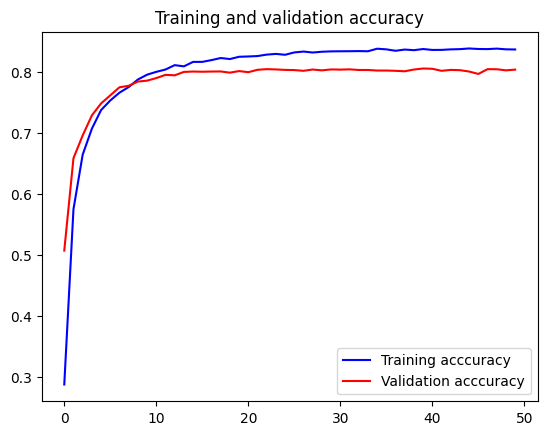

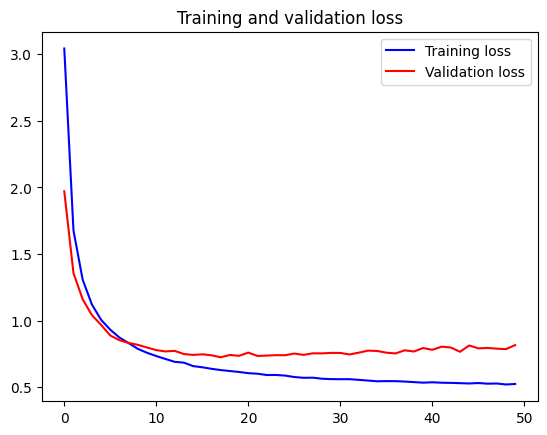

In [30]:
acc = mbl_history.history['accuracy']
val_acc = mbl_history.history['val_accuracy']
loss = mbl_history.history['loss']
val_loss = mbl_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acccuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Prediction Test

In [31]:
# Example usage
input_ingredients = ["udang", "telur"]
recommended_recipe = recommend_recipe(mbl_model, input_ingredients)
for recipe in recommended_recipe:
    print(f"Title: {recipe['Title']}")
    print(f"Ingredients: {recipe['Ingredients']}")
    print("\n")

1/1 [==============================] - 1s 1s/step
Title: Bakwan Udang Sederhana
Ingredients: 1/2 kg Tepung terigu (sudah di ayak)--1/2 Udang segar--1 btr Telur--4 siung bawang putih--1 sdm garam--1/2 sdm picin--1/2 bks penyedap rasa--1/2 sdm Merica bubuk--1/2 Ltr Air putih es--Minyak Makan--Daun Bawang (cincang)--Wortel (potong potong kecil)--


Title: Bakso Ayam Udang Keto
Ingredients: 400 gr ayam giling--250 gr udang kupas--3 telur ayam utuh kocok--30 ml minyak goreng--1/2 sdt baking powder--secukupnya garam, lada--2 sdm bawang goreng haluskan--secukupnya Bawang merah & putih--1/2 sdt minyak wijen--Karageenan secukupnya (pengenyal)--Es batu 8 keping kotak--


Title: Tekwan Kuah Udang
Ingredients: Untuk Tekwan :--1/4 ekor ikan tenggiri 🌸--2 butir putih telur 🌸--1 sdm kaldu bubuk 🌸--2 sdt garam 🌸--1 sdt gula (aku pakai brown sugar) 🌸--1 sdt lada 🌸--100 ml air dingin 🌸--20 ml minyak sayur 🌸--200 g tepung kanji 🌸--1 liter Air untuk merebus--2 sdm minyak sayur untuk rebusan--Untuk Kuah Te

#### Save The Model

In [32]:
mbl_model.save('mbl_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### CNN

#### Build CNN Model

In [33]:
cnn_model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_seq_length,
        trainable=False
    ),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(num_labels, activation='softmax')
], name="cnn_model")

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 300)           65400     
                                                                 
 conv1d (Conv1D)             (None, 42, 128)           192128    
                                                                 
 batch_normalization (Batch  (None, 42, 128)           512       
 Normalization)                                                  
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33

In [34]:
cnn_history = cnn_model.fit(X_train,
                             y_train,
                             epochs=100,
                             batch_size=32,
                             callbacks=[myCallback()],
                            validation_data=(X_test, y_test)
                             )

Epoch 1/100
829/829 [==============================] - 9s 7ms/step - loss: 3.2290 - accuracy: 0.4541 - val_loss: 1.7548 - val_accuracy: 0.6985
Epoch 2/100
829/829 [==============================] - 4s 5ms/step - loss: 1.8515 - accuracy: 0.6240 - val_loss: 1.3920 - val_accuracy: 0.7337
Epoch 3/100
829/829 [==============================] - 4s 5ms/step - loss: 1.5971 - accuracy: 0.6616 - val_loss: 1.2600 - val_accuracy: 0.7495
Epoch 4/100
829/829 [==============================] - 5s 6ms/step - loss: 1.4784 - accuracy: 0.6821 - val_loss: 1.1733 - val_accuracy: 0.7640
Epoch 5/100
829/829 [==============================] - 4s 5ms/step - loss: 1.4024 - accuracy: 0.6978 - val_loss: 1.1281 - val_accuracy: 0.7684
Epoch 6/100
829/829 [==============================] - 4s 5ms/step - loss: 1.3418 - accuracy: 0.7081 - val_loss: 1.1083 - val_accuracy: 0.7669
Epoch 7/100
829/829 [==============================] - 5s 6ms/step - loss: 1.3021 - accuracy: 0.7168 - val_loss: 1.0684 - val_accuracy: 0.7810

#### Evaluation Model

In [35]:
cnn_score = cnn_model.evaluate(X_test, y_test, batch_size=32)
print()
print("ACCURACY:",cnn_score[1])
print("LOSS:",cnn_score[0])

208/208 [==============================] - 1s 4ms/step - loss: 0.8556 - accuracy: 0.8129

ACCURACY: 0.812886655330658
LOSS: 0.8556176424026489


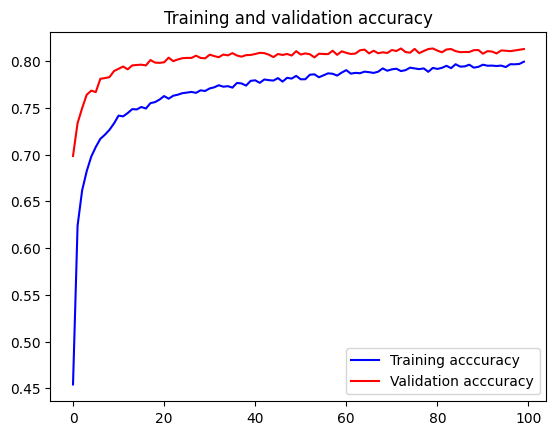

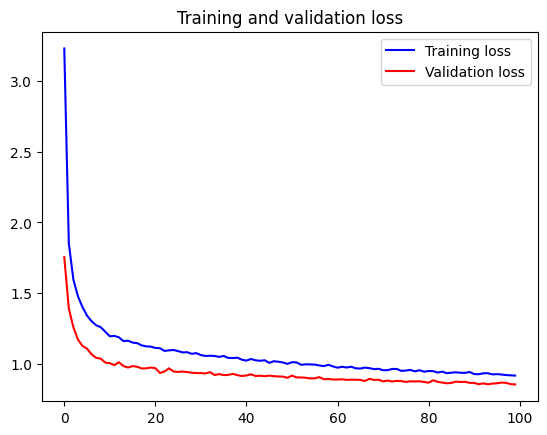

In [36]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acccuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Predict

In [38]:
# Example usage
input_ingredients = ["udang", "ayam"]
recommended_recipe = recommend_recipe(cnn_model, input_ingredients)
for recipe in recommended_recipe:
    print(f"Title: {recipe['Title']}")
    print(f"Ingredients: {recipe['Ingredients']}")
    print("\n")

1/1 [==============================] - 0s 193ms/step
Title: Udang ala pop corn
Ingredients: 1/4 kg udang basah ukuran sedang--1 bungkus kobe tepung ayam super crispy--secukupnya Air matang--Minyak untuk menggoreng--


Title: Tempe goreng segitiga
Ingredients: Tempe secukupnya lalu potong bentuk segitiga--1 sdm tepung ayam (merk apa saja)--1 sdt baking powder--Bumbu halus--3 siung bawang merah--4 siung bawang putih--Sedikit kemiri--iris Daun bawang--Sedikit kunyit bubuk--Secukupnya garam dan penyedap rasa--


Title: Bakso Ayam Udang Keto
Ingredients: 400 gr ayam giling--250 gr udang kupas--3 telur ayam utuh kocok--30 ml minyak goreng--1/2 sdt baking powder--secukupnya garam, lada--2 sdm bawang goreng haluskan--secukupnya Bawang merah & putih--1/2 sdt minyak wijen--Karageenan secukupnya (pengenyal)--Es batu 8 keping kotak--


Title: Ayam goreng tepung
Ingredients: 150 gr fillet ayam--5 sdm tepung bumbu serbaguna--1 butir telur ayam (kocok lepas)--Garam sck--Minya goreng secukupnya untuk 

#### Save The Model

In [39]:
cnn_model.save('cnn_model.h5')

### GRU

#### Build GRU Model

In [40]:
gru_dim = 64
dense_dim = 64

mbg_model = tf.keras.Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_seq_length,
        trainable=False
    ),
    Bidirectional(GRU(gru_dim, return_sequences=True)),
    Bidirectional(GRU(gru_dim)),  # Add another GRU layer
    BatchNormalization(),
    Dropout(0.2),
    Dense(dense_dim, activation='relu'),
    Dense(num_labels, activation='softmax')
])

mbg_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Print the model summary
mbg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 300)           65400     
                                                                 
 bidirectional (Bidirection  (None, 46, 128)           140544    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [41]:
mbg_history = mbg_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=32,
                            callbacks=[myCallback()],
                            validation_data=(X_test, y_test)
                            )

Epoch 1/50
829/829 [==============================] - 23s 17ms/step - loss: 2.7354 - accuracy: 0.3916 - val_loss: 3.7538 - val_accuracy: 0.2556
Epoch 2/50
829/829 [==============================] - 14s 17ms/step - loss: 1.4700 - accuracy: 0.6405 - val_loss: 1.6378 - val_accuracy: 0.5938
Epoch 3/50
829/829 [==============================] - 13s 16ms/step - loss: 1.2234 - accuracy: 0.6938 - val_loss: 1.3534 - val_accuracy: 0.6709
Epoch 4/50
829/829 [==============================] - 12s 15ms/step - loss: 1.0915 - accuracy: 0.7230 - val_loss: 1.1931 - val_accuracy: 0.6925
Epoch 5/50
829/829 [==============================] - 13s 15ms/step - loss: 0.9914 - accuracy: 0.7452 - val_loss: 1.0208 - val_accuracy: 0.7329
Epoch 6/50
829/829 [==============================] - 13s 15ms/step - loss: 0.9317 - accuracy: 0.7606 - val_loss: 0.9092 - val_accuracy: 0.7670
Epoch 7/50
829/829 [==============================] - 12s 15ms/step - loss: 0.8779 - accuracy: 0.7715 - val_loss: 0.8835 - val_accuracy:

#### Evaluation Model

In [42]:
mbg_score = mbg_model.evaluate(X_test, y_test, batch_size=32)
print()
print("ACCURACY:",mbg_score[1])
print("LOSS:",mbg_score[0])

208/208 [==============================] - 1s 6ms/step - loss: 0.7892 - accuracy: 0.8061

ACCURACY: 0.8060962557792664
LOSS: 0.789207935333252


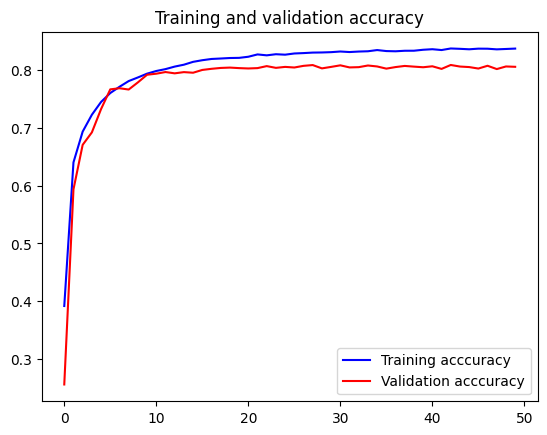

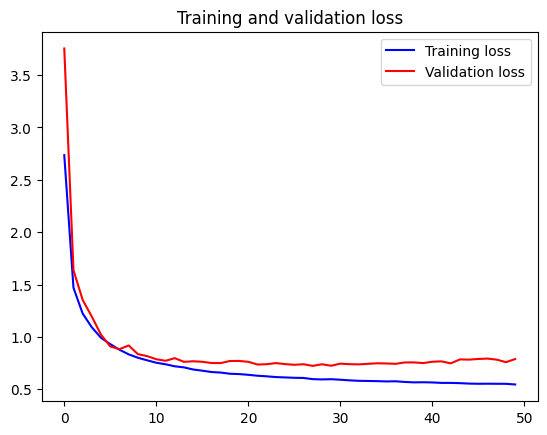

In [43]:
acc = mbg_history.history['accuracy']
val_acc = mbg_history.history['val_accuracy']
loss = mbg_history.history['loss']
val_loss = mbg_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acccuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Prediction Test

In [44]:
# Example usage
input_ingredients = ["udang", "telur"]
recommended_recipe = recommend_recipe(mbg_model, input_ingredients)
for recipe in recommended_recipe:
    print(f"Title: {recipe['Title']}")
    print(f"Ingredients: {recipe['Ingredients']}")
    print("\n")

1/1 [==============================] - 1s 1s/step
Title: Bakwan Udang Sederhana
Ingredients: 1/2 kg Tepung terigu (sudah di ayak)--1/2 Udang segar--1 btr Telur--4 siung bawang putih--1 sdm garam--1/2 sdm picin--1/2 bks penyedap rasa--1/2 sdm Merica bubuk--1/2 Ltr Air putih es--Minyak Makan--Daun Bawang (cincang)--Wortel (potong potong kecil)--


Title: Bakso Ayam Udang Keto
Ingredients: 400 gr ayam giling--250 gr udang kupas--3 telur ayam utuh kocok--30 ml minyak goreng--1/2 sdt baking powder--secukupnya garam, lada--2 sdm bawang goreng haluskan--secukupnya Bawang merah & putih--1/2 sdt minyak wijen--Karageenan secukupnya (pengenyal)--Es batu 8 keping kotak--


Title: Bakso udang debm
Ingredients: 500 gram udang--1 sdm tepung keto--1 butir putih telur--1 sdm minyak wijen (opsional)--3 biji bawang putih--Secukupnya garam--3 cube es batu--Secukupnya air es--


Title: Lumpia udang kulit tahu ala fe'
Ingredients: 50 gram ayam potong kotak kecil--200 gram udang besar potong kecil--1 lembar 

#### Save The Model

In [45]:
mbg_model.save('mbg_model.h5')

### CNN + LSTM

#### Build CNN + LSTM Model

In [46]:
clstm_model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_seq_length,
        trainable=False
    ),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Bidirectional(LSTM(128, return_sequences=True)),
    LSTM(128),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(num_labels, activation='softmax')
], name="clstm_model")

clstm_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

clstm_model.summary()

Model: "clstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 46, 300)           65400     
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 128)           192128    
                                                                 
 batch_normalization_2 (Bat  (None, 42, 128)           512       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 21, 128)           0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           82048     
                                                                 
 batch_normalization_3 (Bat  (None, 17, 128)           

In [47]:
clstm_history = clstm_model.fit(X_train,
                            y_train,
                            epochs=100,
                            batch_size=32,
                            callbacks=[myCallback()],
                            validation_data=(X_test, y_test)
                            )

Epoch 1/100
829/829 [==============================] - 19s 14ms/step - loss: 4.1320 - accuracy: 0.1147 - val_loss: 3.3744 - val_accuracy: 0.1874
Epoch 2/100
829/829 [==============================] - 9s 11ms/step - loss: 3.1727 - accuracy: 0.2411 - val_loss: 2.7645 - val_accuracy: 0.3246
Epoch 3/100
829/829 [==============================] - 11s 13ms/step - loss: 2.7469 - accuracy: 0.3329 - val_loss: 2.4124 - val_accuracy: 0.4088
Epoch 4/100
829/829 [==============================] - 10s 12ms/step - loss: 2.4565 - accuracy: 0.4013 - val_loss: 2.1626 - val_accuracy: 0.4824
Epoch 5/100
829/829 [==============================] - 10s 12ms/step - loss: 2.2436 - accuracy: 0.4540 - val_loss: 2.0271 - val_accuracy: 0.5173
Epoch 6/100
829/829 [==============================] - 10s 12ms/step - loss: 2.0735 - accuracy: 0.5058 - val_loss: 1.8418 - val_accuracy: 0.5727
Epoch 7/100
829/829 [==============================] - 10s 12ms/step - loss: 1.9241 - accuracy: 0.5509 - val_loss: 1.7518 - val_acc

#### Evaluation Model

In [48]:
clstm_score = clstm_model.evaluate(X_test, y_test, batch_size=32)
print()
print("ACCURACY:",clstm_score[1])
print("LOSS:",clstm_score[0])

208/208 [==============================] - 1s 5ms/step - loss: 1.0007 - accuracy: 0.7838

ACCURACY: 0.7837634086608887
LOSS: 1.0006507635116577


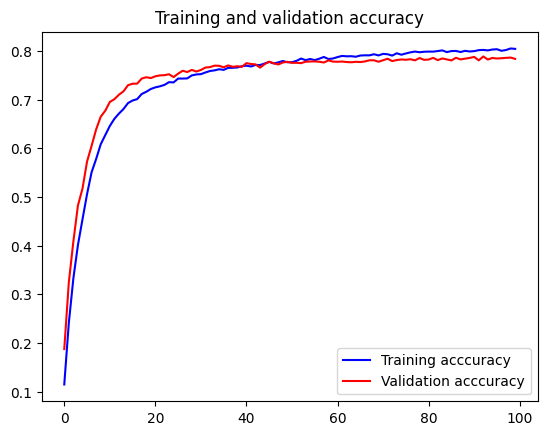

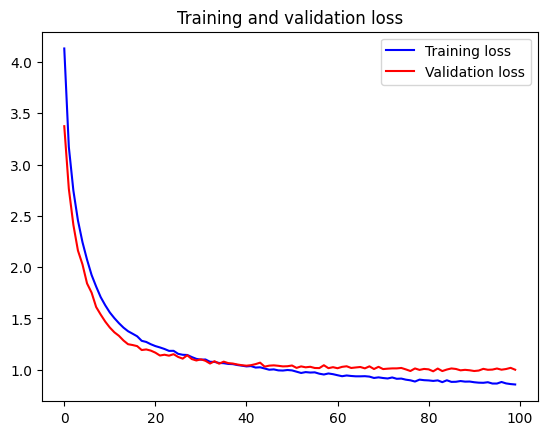

In [49]:
acc = clstm_history.history['accuracy']
val_acc = clstm_history.history['val_accuracy']
loss = clstm_history.history['loss']
val_loss = clstm_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acccuracy')
plt.plot(epochs, val_acc, 'r', label='Validation acccuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Prediction Test

In [50]:
# Example usage
input_ingredients = ["udang", "telur"]
recommended_recipe = recommend_recipe(clstm_model, input_ingredients)
for recipe in recommended_recipe:
    print(f"Title: {recipe['Title']}")
    print(f"Ingredients: {recipe['Ingredients']}")
    print("\n")

1/1 [==============================] - 1s 1s/step
Title: Bakwan Udang Sederhana
Ingredients: 1/2 kg Tepung terigu (sudah di ayak)--1/2 Udang segar--1 btr Telur--4 siung bawang putih--1 sdm garam--1/2 sdm picin--1/2 bks penyedap rasa--1/2 sdm Merica bubuk--1/2 Ltr Air putih es--Minyak Makan--Daun Bawang (cincang)--Wortel (potong potong kecil)--


Title: Bakso Ayam Udang Keto
Ingredients: 400 gr ayam giling--250 gr udang kupas--3 telur ayam utuh kocok--30 ml minyak goreng--1/2 sdt baking powder--secukupnya garam, lada--2 sdm bawang goreng haluskan--secukupnya Bawang merah & putih--1/2 sdt minyak wijen--Karageenan secukupnya (pengenyal)--Es batu 8 keping kotak--


Title: Bakso udang debm
Ingredients: 500 gram udang--1 sdm tepung keto--1 butir putih telur--1 sdm minyak wijen (opsional)--3 biji bawang putih--Secukupnya garam--3 cube es batu--Secukupnya air es--


Title: Carbonara Linguine smooked beef
Ingredients: Pasta linguine (bisa pasta lain) sesuai selera +/- 200gr--3 strip smooked bee

#### Save The Model

In [51]:
clstm_model.save('clstm_model.h5')